In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [3]:
# Replace 'data.csv' with the actual path to your dataset
df = pd.read_csv('weatherAUS.csv')

print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [5]:
distinct_values = df['Location'].unique()

print("Distinct values:", distinct_values)

Distinct values: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


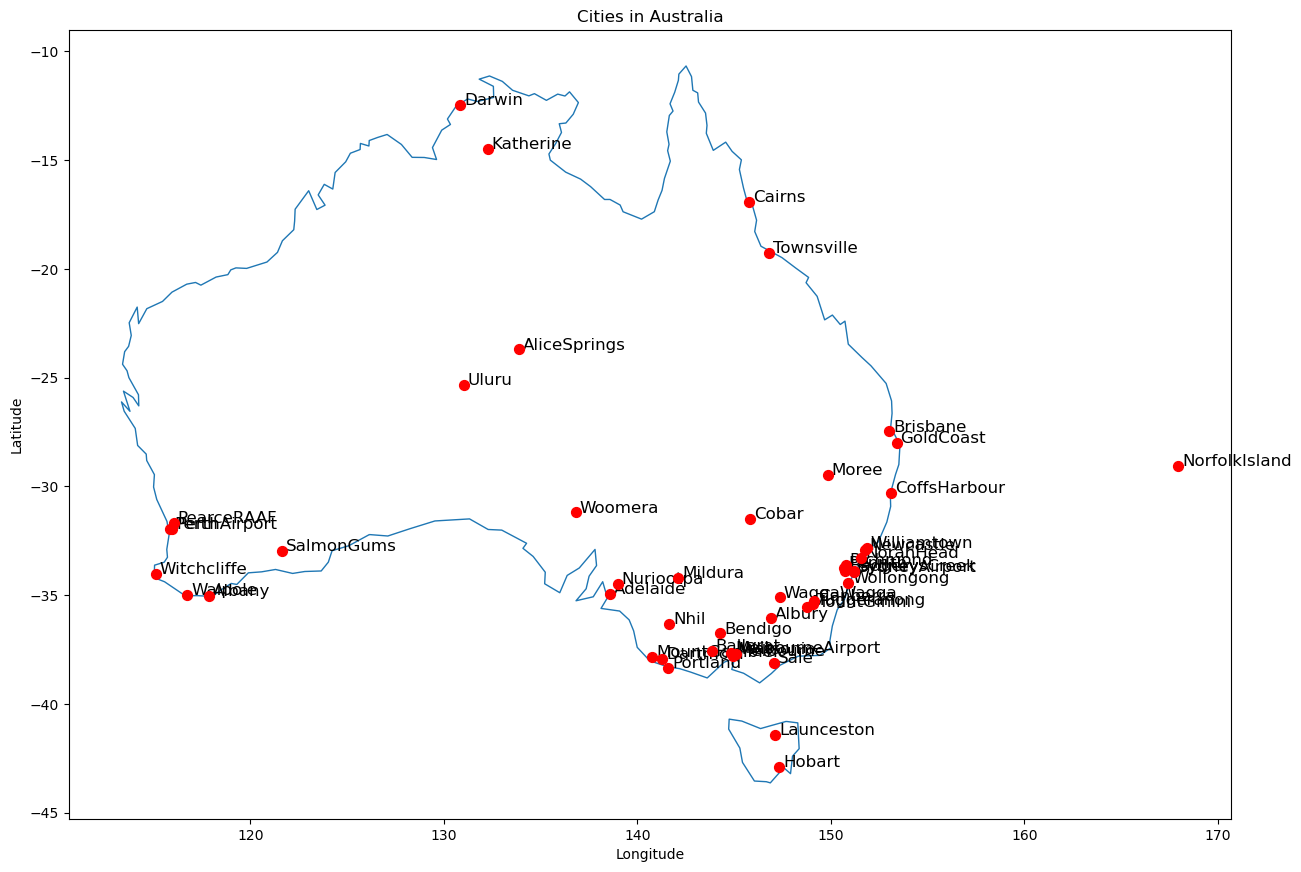

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# List of cities to mark on the map
cities = ["Albury", "BadgerysCreek", "Cobar", "CoffsHarbour", "Moree", "Newcastle",
          "NorahHead", "NorfolkIsland", "Penrith", "Richmond", "Sydney", "SydneyAirport",
          "WaggaWagga", "Williamtown", "Wollongong", "Canberra", "Tuggeranong",
          "MountGinini", "Ballarat", "Bendigo", "Sale", "MelbourneAirport", "Melbourne",
          "Mildura", "Nhil", "Portland", "Watsonia", "Dartmoor", "Brisbane", "Cairns",
          "GoldCoast", "Townsville", "Adelaide", "MountGambier", "Nuriootpa", "Woomera",
          "Albany", "Witchcliffe", "PearceRAAF", "PerthAirport", "Perth", "SalmonGums",
          "Walpole", "Hobart", "Launceston", "AliceSprings", "Darwin", "Katherine", "Uluru"]

# Geographical coordinates for the cities (latitude, longitude)
# Please note that these coordinates are approximate and may not be 100% accurate.
coordinates = {
    "Albury": [-36.0737, 146.9135],
    "BadgerysCreek": [-33.8968, 150.7441],
    "Cobar": [-31.4980, 145.8340],
    "CoffsHarbour": [-30.2963, 153.1135],
    "Moree": [-29.4658, 149.8407],
    "Newcastle": [-32.9267, 151.7765],
    "NorahHead": [-33.2832, 151.5676],
    "NorfolkIsland": [-29.0408, 167.9547],
    "Penrith": [-33.7520, 150.6910],
    "Richmond": [-33.6007, 150.7564],
    "Sydney": [-33.8688, 151.2093],
    "SydneyAirport": [-33.9399, 151.1753],
    "WaggaWagga": [-35.1082, 147.3598],
    "Williamtown": [-32.8150, 151.8428],
    "Wollongong": [-34.4278, 150.8931],
    "Canberra": [-35.2809, 149.1300],
    "Tuggeranong": [-35.4244, 149.0888],
    "MountGinini": [-35.5294, 148.7723],
    "Ballarat": [-37.5622, 143.8503],
    "Bendigo": [-36.7570, 144.2794],
    "Sale": [-38.1117, 147.0682],
    "MelbourneAirport": [-37.6690, 144.8410],
    "Melbourne": [-37.8136, 144.9631],
    "Mildura": [-34.2080, 142.1246],
    "Nhil": [-36.3328, 141.6503],
    "Portland": [-38.3634, 141.6052],
    "Watsonia": [-37.7110, 145.0830],
    "Dartmoor": [-37.9224, 141.2767],
    "Brisbane": [-27.4698, 153.0251],
    "Cairns": [-16.9186, 145.7781],
    "GoldCoast": [-28.0167, 153.4000],
    "Townsville": [-19.2580, 146.8169],
    "Adelaide": [-34.9285, 138.6007],
    "MountGambier": [-37.8284, 140.7804],
    "Nuriootpa": [-34.4694, 138.9938],
    "Woomera": [-31.1999, 136.8256],
    "Albany": [-35.0275, 117.8840],
    "Witchcliffe": [-34.0261, 115.1005],
    "PearceRAAF": [-31.6672, 116.0292],
    "PerthAirport": [-31.9403, 115.9668],
    "Perth": [-31.9505, 115.8605],
    "SalmonGums": [-32.9815, 121.6438],
    "Walpole": [-34.9777, 116.7338],
    "Hobart": [-42.8821, 147.3272],
    "Launceston": [-41.4341, 147.1374],
    "AliceSprings": [-23.6980, 133.8807],
    "Darwin": [-12.4634, 130.8456],
    "Katherine": [-14.4652, 132.2635],
    "Uluru": [-25.3444, 131.0369]
}

# Create a DataFrame from the coordinates dictionary
df_coordinates = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])

# Plotting the map
australia_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia_map = australia_map[australia_map['name'] == 'Australia']

fig, ax = plt.subplots(1, figsize=(15, 15))
australia_map.boundary.plot(ax=ax, linewidth=1)
plt.scatter(df_coordinates['Longitude'], df_coordinates['Latitude'], c='red', s=50, zorder=5)

# Label the cities
for city, coords in coordinates.items():
    ax.text(coords[1] + 0.2, coords[0], city, fontsize=12)

plt.title("Cities in Australia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [6]:
BadgerysCreek,penrith,richmand,SydneyAirport,Wollongong

NameError: name 'BadgerysCreek' is not defined